<a href="https://colab.research.google.com/github/faizrahman247/Online-Retail-Customer-Segmentation-Unsupervised-ML-/blob/main/Online_Retail_Customer_Segmentation_by_Mohd_Faizurrahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Mohd Faizurrahman (Individual)

<p align="center">
  <img width="750" height="400" src="https://projectgurukul.org/wp-content/uploads/2022/01/customer-segmentation.webp">
</p>

# **Project Summary -**



* This project centers on the segmentation of online retail customers, a critical element in contemporary business operations. By organizing customers into distinct groups based on their characteristics, companies can extract valuable insights and tailor their strategies to cater to the specific needs of each segment.

*   The primary aim of this project was to analyze a dataset from a UK-based online retail company specializing in all-occasion gifts. Spanning from 01/12/2010 to 09/12/2011, the dataset comprised transactions made by both individual customers and wholesalers.

*   To accomplish this task, I employed the Recency-Frequency-Monetary (RFM) model, which assigns numerical values to customers based on three primary dimensions: the recency of their last purchase, the frequency of their transactions, and the monetary value of their purchases. Through the utilization of advanced clustering algorithms like K-Means, Agglomerative Hierarchical Clustering, and DBSCAN, I effectively segmented the customers into discernible groups.
*   The project encompassed several phases, including data examination, exploratory data analysis (EDA), data preprocessing, RFM model construction, and the application of clustering algorithms. These steps enabled me to uncover significant insights into customer behavior, pinpoint crucial customer segments, and draw actionable conclusions that can inform targeted marketing strategies and bolster customer satisfaction.


*  In essence, this project underscored my proficiency in data analysis, customer segmentation, and the implementation of clustering algorithms. The insights derived from this endeavor can equip businesses with the tools to refine their offerings, enhance customer experiences, and foster growth within the fiercely competitive online retail landscape.









# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The aim of this project is to construct a customer segmentation model tailored for an online retail enterprise. The objective is to extract valuable insights from the customer base, enabling the implementation of targeted strategies aimed at improving customer satisfaction, boosting sales, and refining marketing endeavors. Through the analysis of transactional data alongside customer attributes like purchasing patterns, demographics, and geographic details, the project seeks to establish coherent customer segments. These segments will serve as a foundation for personalized marketing initiatives, streamlining inventory management, and nurturing enduring customer loyalty.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced data visualization
from datetime import datetime  # For datetime operations
import matplotlib.pyplot as plt  # For creating visualizations
import missingno as msno  # For visualizing missing data patterns
from sklearn import preprocessing  # For data preprocessing
from sklearn.datasets import make_blobs  # For generating synthetic datasets
from sklearn.cluster import KMeans  # For KMeans clustering algorithm
from sklearn.metrics import silhouette_samples, silhouette_score  # For silhouette analysis
import matplotlib.cm as cm  # For color maps
from sklearn.preprocessing import StandardScaler  # For feature scaling
import warnings  # For suppressing warnings
warnings.filterwarnings('ignore')

# Setting display options
pd.set_option('display.max_columns', 500)  # Display maximum columns in DataFrame
plt.style.use('ggplot')  # Setting the plot style to 'ggplot'



### Dataset Loading

In [ ]:
# Mounting Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
retail_df = pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")

### Dataset First View

In [ ]:
# Dataset First Look
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, columns = retail_df.shape  # The df.shape attribute of a DataFrame returns a tuple containing the number of rows and columns in the DataFrame.

print(f'The dataset has {rows} rows and {columns} columns')


The dataset has 541909 rows and 8 columns


### Dataset Information

In [ ]:
# Dataset Info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = retail_df.duplicated().sum()
print(f'The dataset contains {duplicate_count} duplicate rows.')


The dataset contains 5268 duplicate rows.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = retail_df.isnull().sum()
print('Missing Values/Null Values Count:')
print(missing_values_count)

print('=' *25)
# Calculating the percentage of missing or null values in each column of the dataset
missing_data_percentage = (retail_df.isnull().sum() / len(retail_df)) * 100
print('Missing Data Percentage:')
print(missing_data_percentage)


Missing Values/Null Values Count:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Missing Data Percentage:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


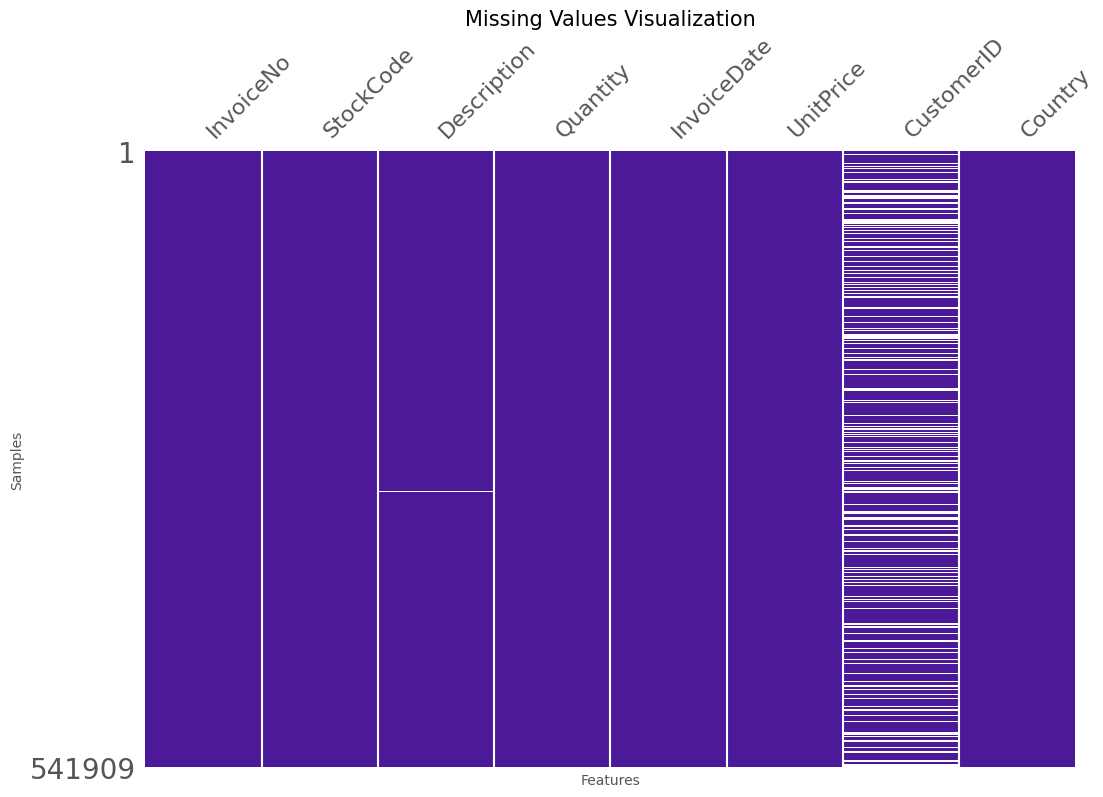

In [ ]:
# Visualizing the missing values

import missingno as msno  # For visualizing missing data patterns


# Using the matrix plot from missingno library to visualize missing values in the dataset
msno.matrix(retail_df, figsize=(12,8), sparkline=False, color=(0.30,0.10,0.60))   #Set sparkline to False to disable the sparkline display for each feature
plt.title('Missing Values Visualization', fontsize=15)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Samples', fontsize=10)
plt.show()


**Observation**

Approximately a quarter (24.93%) of the purchased items have no assigned customer. Since customer assignment is crucial for clustering, data lacking CustomerID serves no purpose. Therefore, we'll remove these entries from the dataset.

### What did you know about your dataset?

* The dataset comprises transactions recorded between 01/12/2010 and 09/12/2011 for a UK-based non-store online retail company.
* The company specializes in offering unique gifts suitable for various occasions.
* A significant portion of the company's clientele consists of wholesalers.
* With a total of 541,909 entries and 8 columns, the dataset provides a comprehensive snapshot of the company's operations.
* Data types across columns include 2 float64, 1 int64, 4 object, and 1 datetime64.
* The dataset contains 5,268 duplicated values.
* Regarding missing data:
               CustomerID is missing in 24.93% of entries.
               Description is missing in 0.27% of entries.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
retail_df.describe().T   # The describe() method to generate descriptive statistics for the DataFrame columns.
                         # The .T attribute transposes the result, swapping rows and columns.

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


### Variables Description

* **InvoiceNo:**  This attribute denotes the invoice or transaction number associated with each purchase. It acts as a unique identifier for every transaction, consisting of a 6-digit integral number, with a 'c' prefix indicating cancellations. (Data type: Nominal)

* **StockCode:** The StockCode field represents a unique code assigned to each distinct product within the inventory. It aids in distinguishing between different products purchased by customers, comprising a 5-digit integral number. (Data type: Nominal)

* **Description:** This feature provides a concise description or name of the product bought in each transaction, offering a textual representation of the item. (Data type: Nominal)

* **Quantity:** Denoting the quantity of each product purchased in a transaction, this attribute indicates the number of units of a specific product acquired by the customer. (Data type: Integer)

* **InvoiceDate:** The InvoiceDate attribute signifies the date and time of each transaction, facilitating tracking of transaction timing and frequency. (Data type: DateTime)

* **UnitPrice:**This field represents the price of each unit of the product in the local currency (e.g., sterling, dollars, euros), providing information on the cost per unit of the product. (Data type: Float)

* **CustomerID:** Serving as a unique identifier for each customer, the CustomerID attribute aids in monitoring individual customer behavior and preferences. (Data type: Float)

* **Country:** The Country field indicates the country where each customer resides or where the transaction occurred, offering insights into customer geographic distribution. (Data type: Nominal, country name)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

# Iterating through each column in the DataFrame
for i in retail_df.columns.tolist():
  print("Number of unique values in",i,"is",retail_df[i].nunique())


Number of unique values in InvoiceNo is 25900
Number of unique values in StockCode is 4070
Number of unique values in Description is 4223
Number of unique values in Quantity is 722
Number of unique values in InvoiceDate is 23260
Number of unique values in UnitPrice is 1630
Number of unique values in CustomerID is 4372
Number of unique values in Country is 38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

df = retail_df.copy()   #keeping orginal data safe

In [ ]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
# Create 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


### What all manipulations have you done and insights you found?

After performing the above data manipulations, the dataset is now ready for analysis. Here's a summary of the manipulations done:

**Handling Missing Values:**

Rows with missing CustomerID were dropped since they are crucial for customer segmentation and analysis.

**Handling Duplicate Rows:**

Duplicate rows were removed to ensure data integrity and accuracy of analysis.

**Creating a new column "TotalPrice"**

A new column 'TotalPrice' was created by multiplying 'Quantity' and 'UnitPrice' to analyze transaction value.


With the dataset prepared, we can now proceed with exploratory data analysis to gain insights into customer behavior, sales trends, and other important aspects of the retail business. Insights that can be derived from further analysis include identifying high-value customers, understanding popular products, analyzing sales trends over time, and segmenting customers based on their purchasing behavior.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Univariate Analysis
Univariate Analysis involves examining the characteristics, distribution, and properties of one variable at a time without considering its relationship with other variables. Univariate analysis provides insights into the individual variable's behavior and helps understand its distribution within the dataset.

#### Chart - 1    (Top Five Customers)


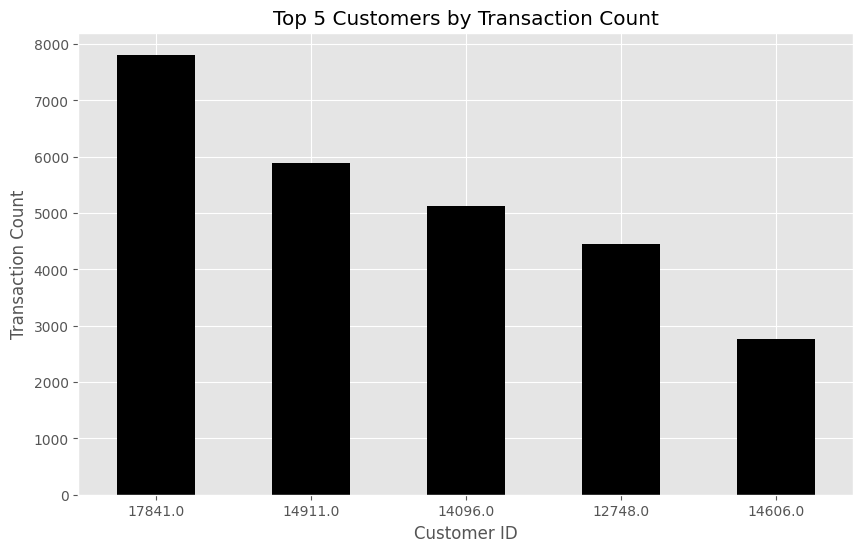

In [ ]:
# Chart - 1 visualization code
# Calculate the count of transactions for each customer
customer_transaction_count = df['CustomerID'].value_counts().head(5)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
customer_transaction_count.plot(kind='bar', color='black')
plt.title('Top 5 Customers by Transaction Count')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)
plt.show()




##### 1. Why did you pick the specific chart?

A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 customer IDs.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insight into the customers who make the most purchases from the business and helps identify potential loyal customers or areas for improvement in customer retention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

#### Chart - 2 (Top 5 Countries by Transaction Count)

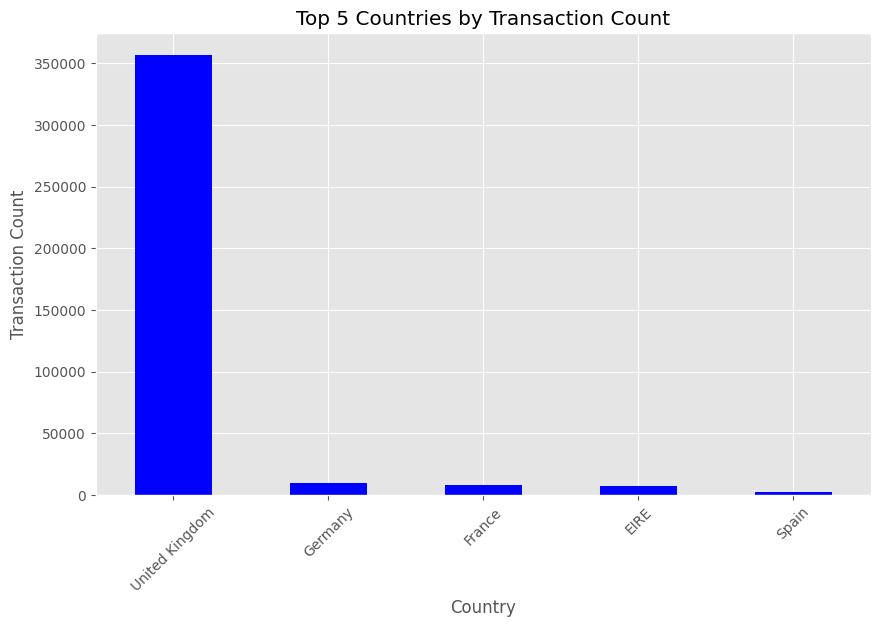

In [ ]:
# Chart - 2 visualization code
# Calculate the count of transactions for each country
country_transaction_count = df['Country'].value_counts().head(5)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
country_transaction_count.plot(kind='bar', color='blue')
plt.title('Top 5 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 countries.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insight that the most of the customers are from United Kingdom that make sense as company is from UK bases after that we have Germany ,France ,EIRE and Spain.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

#### Chart - 3 (Top 10 Selling Products)

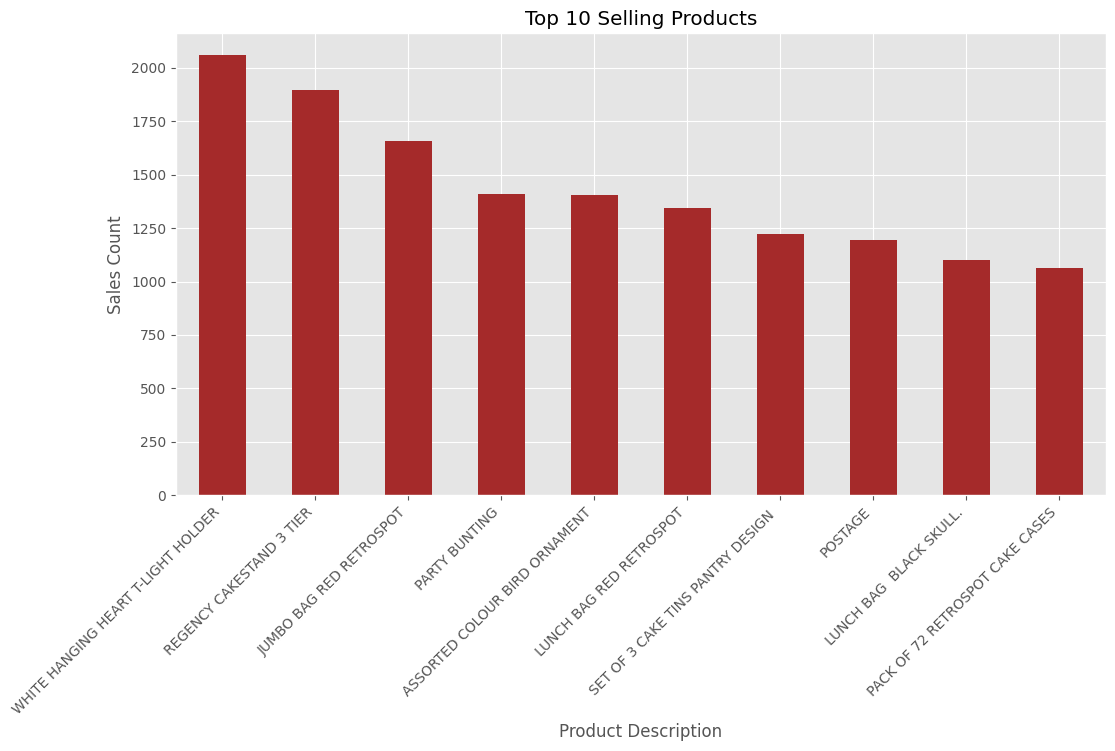

In [ ]:
# Chart - 3 visualization code
# Calculate the count of sales for each product
product_sales_count = df['Description'].value_counts().head(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
product_sales_count.plot(kind='bar', color='brown')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')
plt.show()




##### 1. Why did you pick the specific chart?

A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 10 selling products.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the quantity of each of the top 10 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.

#### Chart - 4 (Least Selling Products)

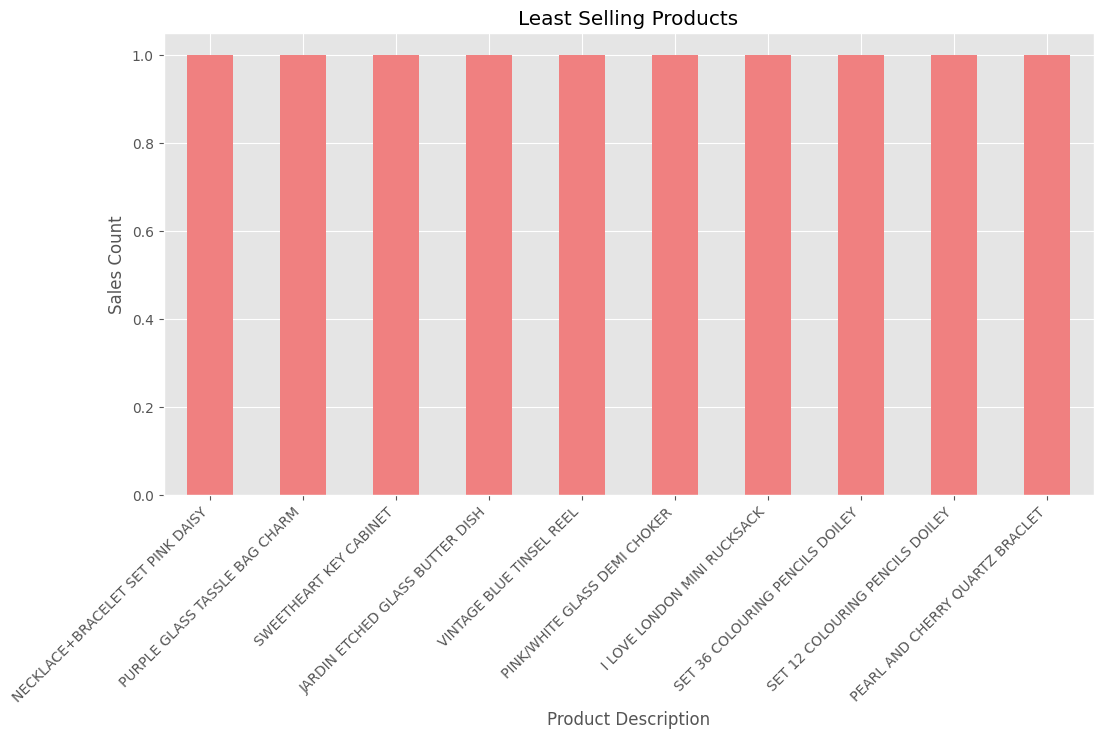

In [ ]:
# Chart - 4 visualization code

# Calculate the count of sales for each product
product_sales_count = df['Description'].value_counts()

# Filter out the least selling products (bottom 10)
least_selling_products = product_sales_count.tail(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
least_selling_products.plot(kind='bar', color='lightcoral')
plt.title('Least Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is a suitable choice for representing the top 10 least selling products as it provides a clear and concise visual comparison between the products in terms of their sales volume. It also allows for easy identification of the products with the lowest sales figures.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into which products have had the lowest sales volume, which can be useful information for businesses to determine which products may need to be discounted or promoted in order to increase sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.

#### Chart - 5 (Transaction Frequency Over Time)

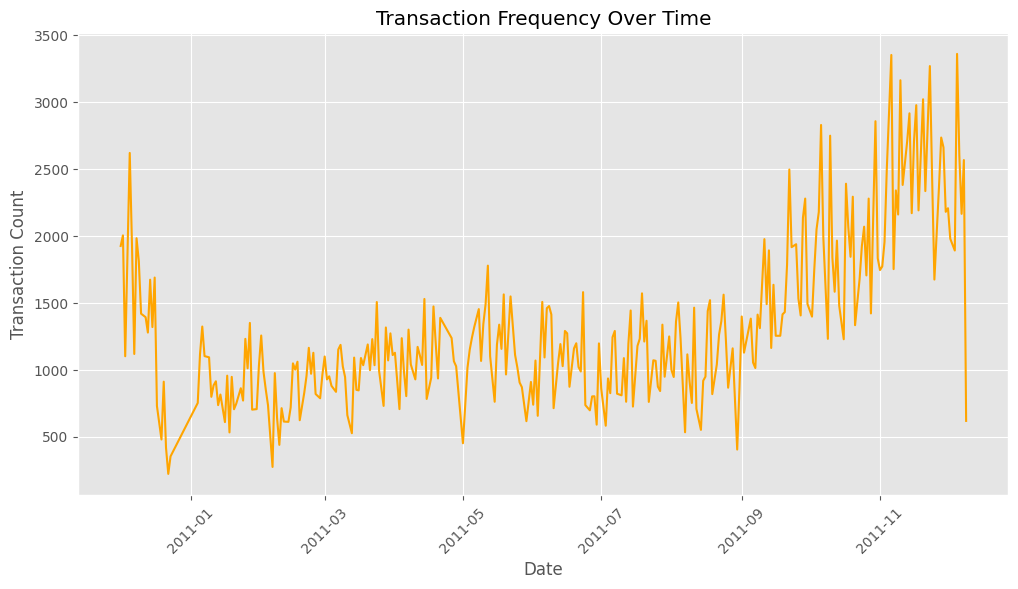

In [ ]:
# Chart - 5 visualization code
# Extracting transaction dates from the 'InvoiceDate' column
transaction_dates = df['InvoiceDate'].dt.date

# Counting the frequency of transactions for each date
transaction_date_counts = transaction_dates.value_counts().sort_index()

# Plotting the line plot
plt.figure(figsize=(12, 6))
transaction_date_counts.plot(kind='line', color='orange')
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

 A line plot is suitable for representing data that changes continuously over a range, such as dates on the x-axis and transaction counts on the y-axis.




##### 2. What is/are the insight(s) found from the chart?

This analysis provides insights into the pattern of transaction frequency over time, allowing you to identify trends, seasonality, or any anomalies in transaction behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing transaction dates can provide valuable information for strategic decision-making and operational planning, businesses must interpret and act upon these insights effectively to leverage positive growth opportunities and mitigate potential negative impacts.

##  **Bivariate Analysis**
Bivariate analysis is a statistical method used to analyze the relationship between two variables. In short, it involves examining how changes in one variable are associated with changes in another variable. Bivariate analysis helps understand the strength, direction, and nature of the relationship between two variables, whether they are numerical or categorical.

#### Chart - 6 (Unit Price vs Total Sales Value)

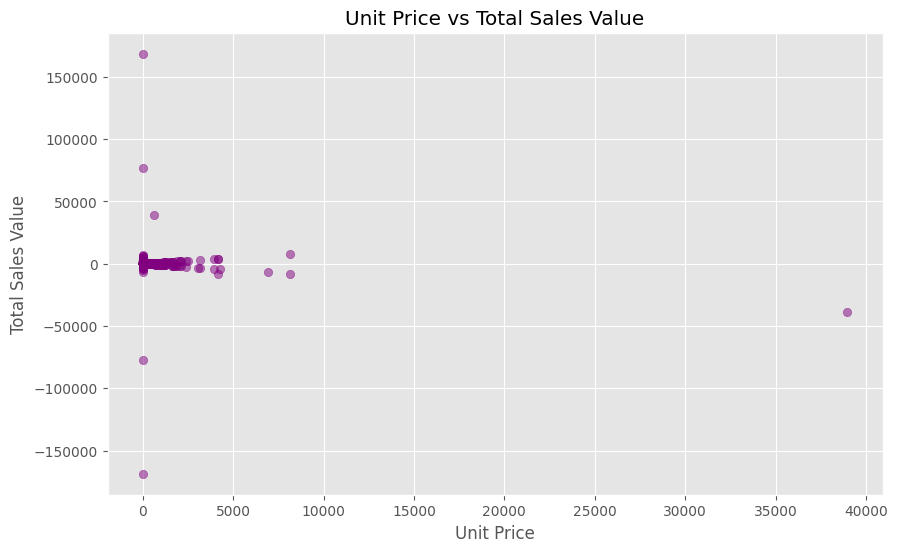

In [ ]:
# Chart - 6 visualization code

# Bivariate Analysis (Numerical - Numerical)

# Scatter plot of UnitPrice vs TotalPrice
plt.figure(figsize=(10, 6))
plt.scatter(df['UnitPrice'], df['TotalPrice'], color='purple', alpha=0.5)
plt.title('Unit Price vs Total Sales Value')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales Value')
plt.show()





##### 1. Why did you pick the specific chart?

 I used a scatter plot to explore the relationship between unit price and total sales value.


##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows that there is a strong correlation between unit price and total sales value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the relationship between unit price and sales value can inform pricing strategies and help identify opportunities to maximize profitability.

#### Chart - 7 (Quantity vs. Total Price)

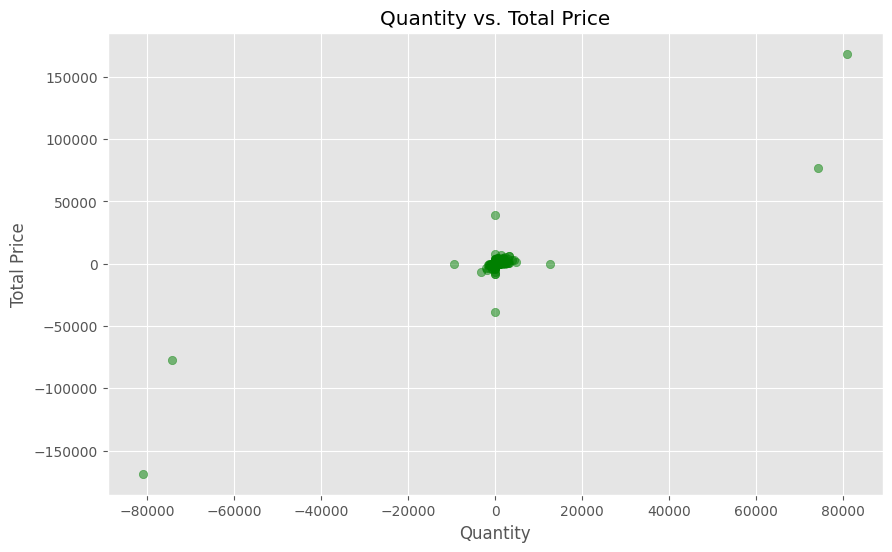

In [ ]:
# Chart - 7 visualization code
# Bivariate Analysis (Numerical - Numerical)

# Scatter plot of Quantity vs. TotalPrice
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['TotalPrice'], alpha=0.5, color='green')
plt.title('Quantity vs. Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()



##### 1. Why did you pick the specific chart?

A scatter plot is chosen to visualize the relationship between quantity purchased and total sales price.

##### 2. What is/are the insight(s) found from the chart?

We can observe if there is any correlation or pattern between the quantity of items purchased and the total sales price per transaction

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying any correlation between quantity and total sales price can help in pricing strategies, bundle offerings, and inventory management. For instance, understanding if bulk purchases result in discounts or if higher-priced items are purchased in larger quantities can inform pricing and promotional strategies.



#### Chart - 8 (Total Sales by Country)

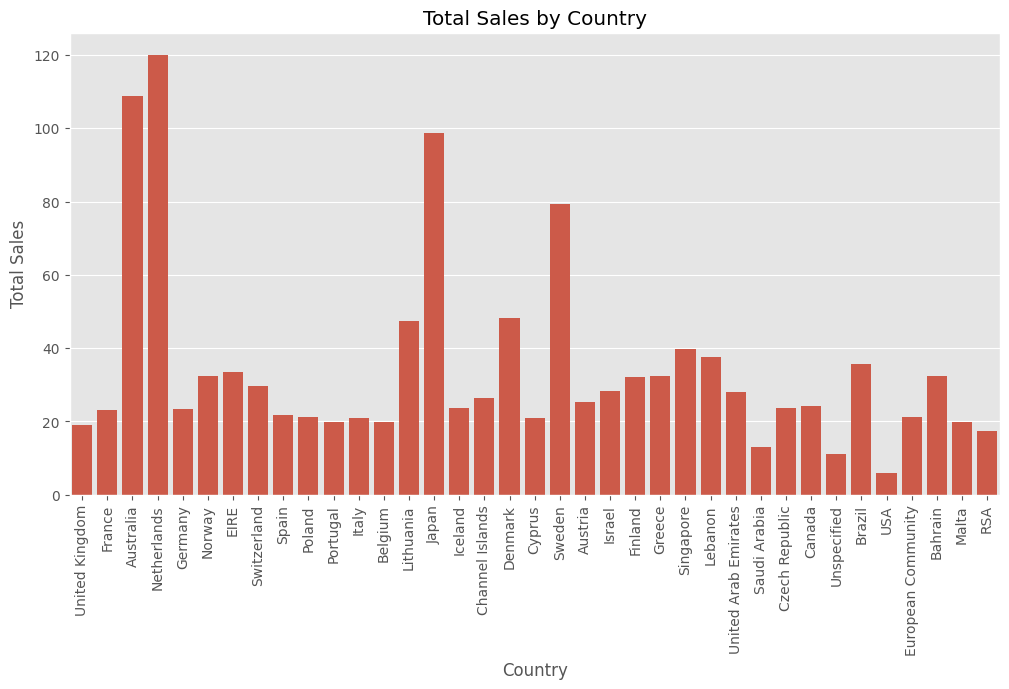

In [ ]:
# Chart - 8 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalPrice', data=df, ci=None)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

This chart helps visualize the total sales made in each country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying countries with the highest sales can help in targeting marketing efforts and allocating resources effectively.

#### Chart - 9 (Unit Price vs Total Sales Value)

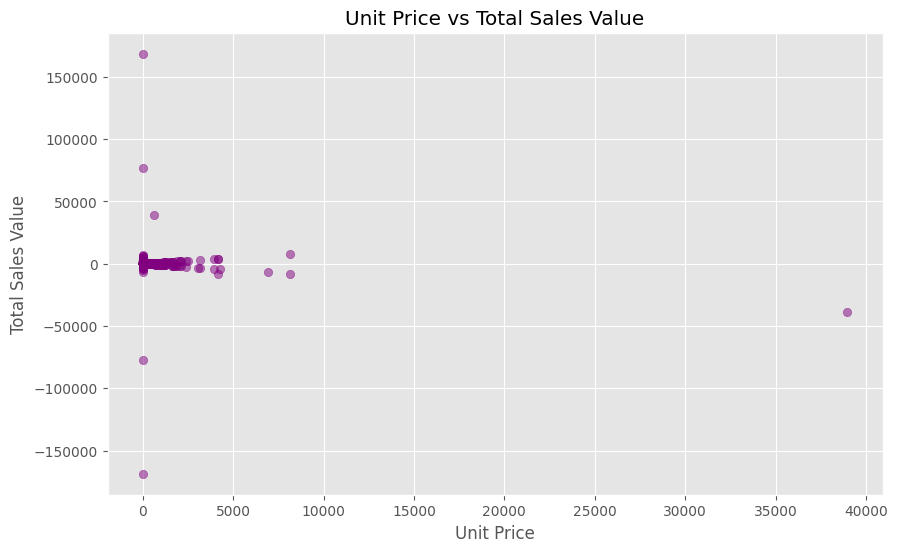

In [ ]:
# Chart - 9 visualization code
# Scatter plot of UnitPrice vs TotalPrice
plt.figure(figsize=(10, 6))
plt.scatter(df['UnitPrice'], df['TotalPrice'], color='purple', alpha=0.5)
plt.title('Unit Price vs Total Sales Value')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales Value')
plt.show()



##### 1. Why did you pick the specific chart?

I used a scatter plot to explore the relationship between unit price and total sales value.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows that there is  strong correlation between unit price and total sales value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the relationship between unit price and sales value can inform pricing strategies and help identify opportunities to maximize profitability.

## **Multivariate Analysis:**


Multivariate analysis is a statistical technique used to analyze datasets that involve observations on more than one variable. Unlike univariate analysis, which deals with a single variable, and bivariate analysis, which examines the relationship between two variables, multivariate analysis involves the simultaneous analysis of multiple variables to understand their interrelationships and to uncover patterns and structures within the data.

#### Chart - 10 (Monthly Customer Acquisition)

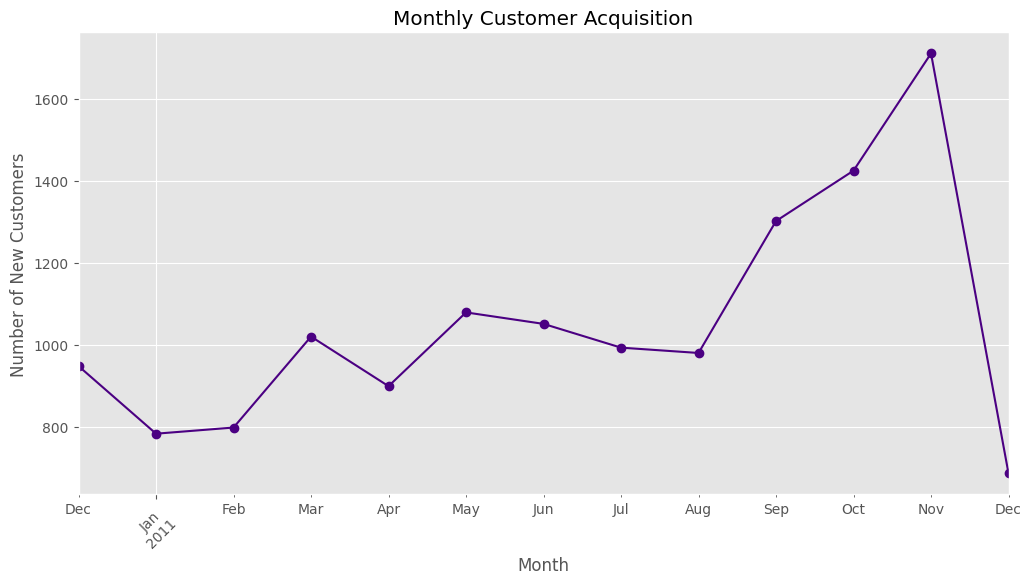

In [ ]:
# Chart - 10 visualization code
# Line plot of Customer Acquisition Over Time
monthly_customers = df.resample('M', on='InvoiceDate')['CustomerID'].nunique()
plt.figure(figsize=(12, 6))
monthly_customers.plot(kind='line', marker='o', color='indigo')
plt.title('Monthly Customer Acquisition')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.show()




##### 1. Why did you pick the specific chart?

I utilized a line plot to visualize customer acquisition trends over time, providing insights into the growth of the customer base.

##### 2. What is/are the insight(s) found from the chart?

The line plot shows fluctuations in the number of new customers acquired each month, indicating periods of growth or decline in customer acquisition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, understanding customer acquisition trends can inform marketing strategies and resource allocation to attract and retain customers, ultimately driving revenue growth.

#### Chart - 11 (Total Sales vs. Quantity with Country Distribution)

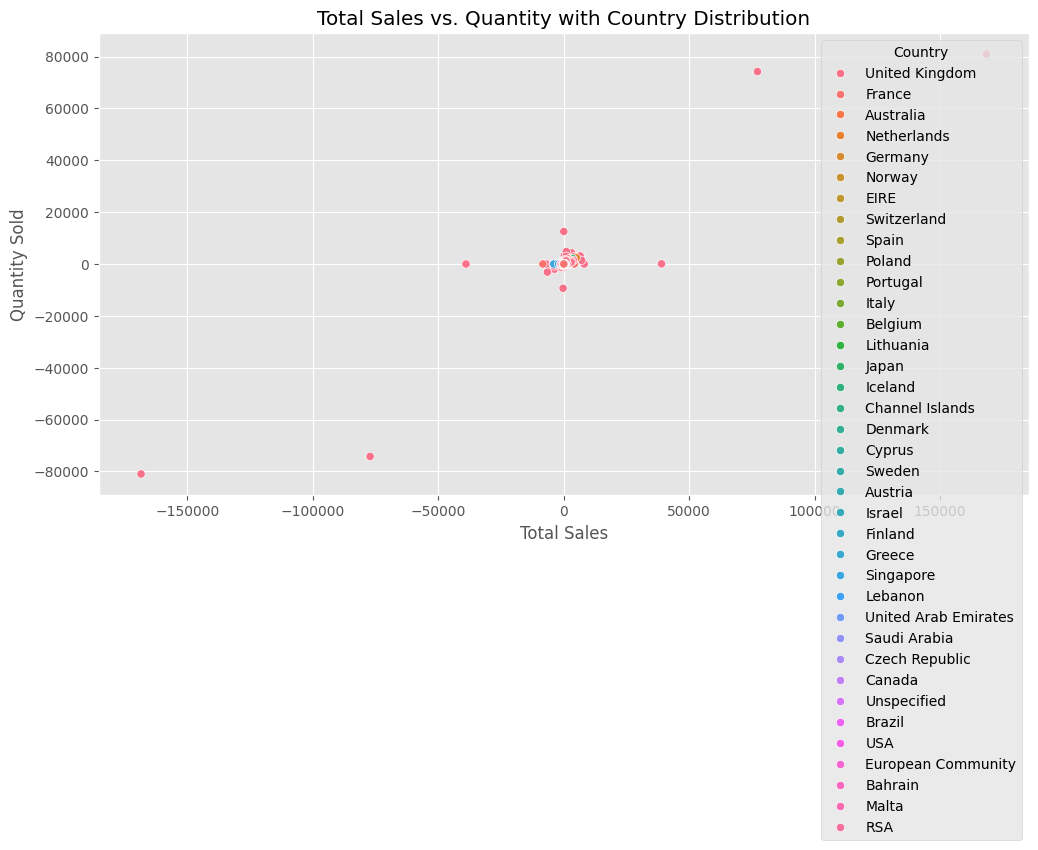

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalPrice', y='Quantity', hue='Country', data=df)
plt.title('Total Sales vs. Quantity with Country Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Quantity Sold')
plt.legend(title='Country')
plt.show()

##### 1. Why did you pick the specific chart?

i pick scatter plot because it visualizes the relationship between total sales and quantity sold, while also showing the distribution across different countries.

##### 2. What is/are the insight(s) found from the chart?

It provides insights into how sales volume and revenue are related across different countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It informs pricing and inventory decisions based on sales performance in different markets.

#### Chart - 12 (Total Sales, Quantity Sold, and Unit Price)

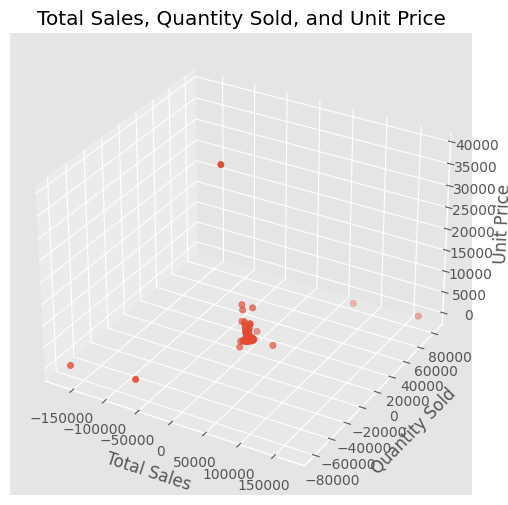

In [ ]:
# Chart - 12 visualization code
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TotalPrice'], df['Quantity'], df['UnitPrice'])
ax.set_xlabel('Total Sales')
ax.set_ylabel('Quantity Sold')
ax.set_zlabel('Unit Price')
plt.title('Total Sales, Quantity Sold, and Unit Price')
plt.show()



##### 1. Why did you pick the specific chart?

3D scatter plot Provides a comprehensive view of the relationship between total sales, quantity sold, and unit price.

##### 2. What is/are the insight(s) found from the chart?

It reveals complex interactions between these variables and potential pricing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 It helps optimize pricing strategies and revenue generation based on sales volume and unit price.

#### Chart - 13 (Monthly Sales Trends)

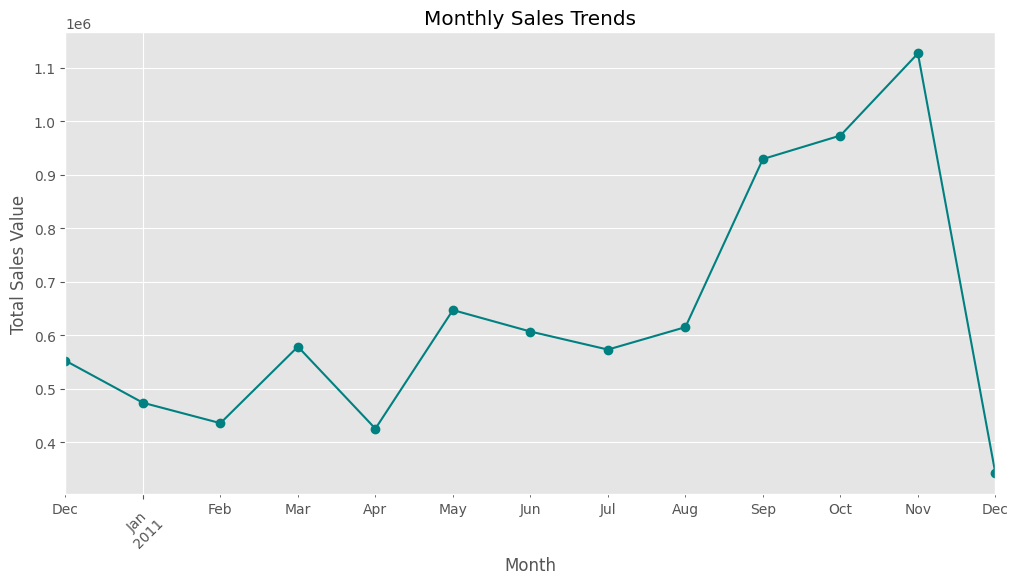

In [ ]:
# Chart - 13 visualization code
# Line plot of Sales Trends Over Time
monthly_sales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

I used a line plot to visualize sales trends over time, providing insights into seasonal patterns and overall sales performance.


##### 2. What is/are the insight(s) found from the chart?

The line plot shows fluctuations in monthly sales, with peaks and troughs indicating seasonal variations in sales performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, understanding sales trends over time can inform inventory planning, marketing strategies, and resource allocation to maximize revenue during peak periods and minimize costs during slower periods.

#### Chart - 14 - Correlation Heatmap

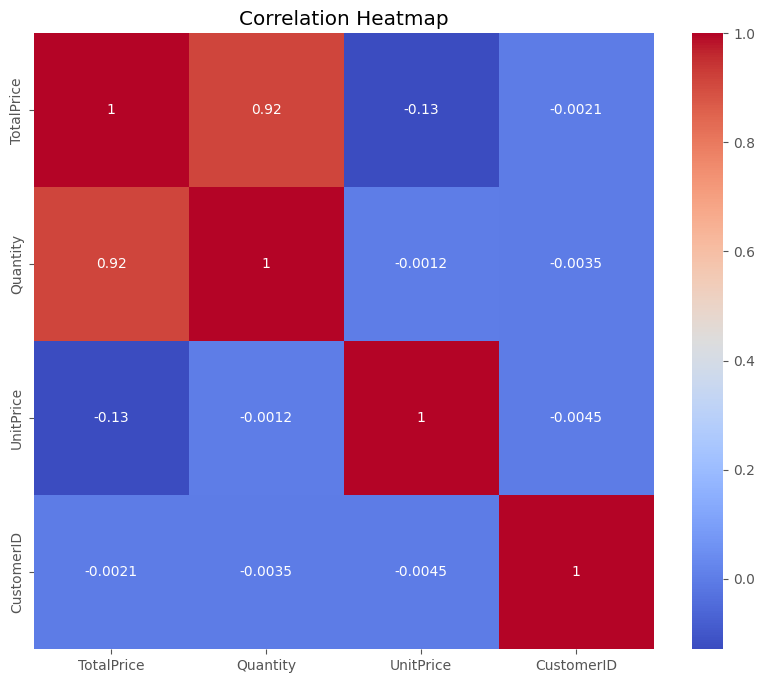

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 8))
sns.heatmap(df[['TotalPrice', 'Quantity', 'UnitPrice', 'CustomerID']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

It visualizes the correlation between different numerical variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

 It identifies any significant correlations between variables.

#### Chart - 15 - Pair Plot

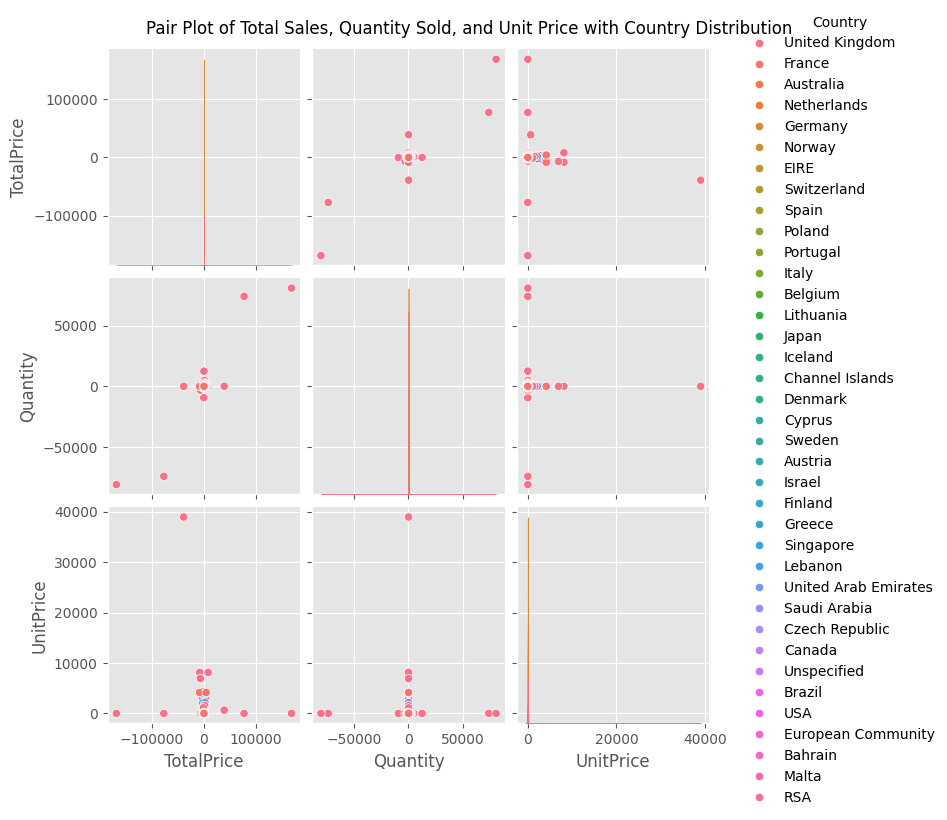

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, vars=['TotalPrice', 'Quantity', 'UnitPrice'], hue='Country')
plt.suptitle('Pair Plot of Total Sales, Quantity Sold, and Unit Price with Country Distribution', y=1.02)
plt.show()




##### 1. Why did you pick the specific chart?

Pair plot offers a visual overview of the relationships between total sales, quantity sold, and unit price, while also showing the distribution across different countries.

##### 2. What is/are the insight(s) found from the chart?

 Ity provides insights into how sales metrics vary across countries.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement - 1**

The average total price of transactions in the United Kingdom (UK) is higher than the average total price of transactions in France.

**Hypothetical Statement - 2**

There is a significant correlation between the quantity of items purchased and the total price of transactions.

**Hypothetical Statement - 3**

The distribution of total prices for transactions involving certain stock codes differs significantly from the overall distribution of total prices across all transactions.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average total price of transactions in the United Kingdom (UK) is equal to the average total price of transactions in France.

**Alternate Hypothesis (H1):** The average total price of transactions in the United Kingdom (UK) is not equal to the average total price of transactions in France.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Filter data for transactions in the UK and France
uk_transactions = df[df['Country'] == 'United Kingdom']['TotalPrice']
france_transactions = df[df['Country'] == 'France']['TotalPrice']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(uk_transactions, france_transactions)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -0.8663370077387037
P-value: 0.38630594638228877


##### Which statistical test have you done to obtain P-Value?

I chose the two-sample t-test to obtain P-Value.

##### Why did you choose the specific statistical test?


I chose the two-sample t-test because it is appropriate for comparing the means of two independent samples. In this scenario, we want to test whether there is a significant difference in the average total prices of transactions between the United Kingdom (UK) and France. The two-sample t-test is well-suited for this purpose as it evaluates whether the difference in means between the two groups is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant correlation between the quantity of items purchased and the total price of transactions.

**Alternate Hypothesis (H1):** There is a significant correlation between the quantity of items purchased and the total price of transactions.







#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(df['Quantity'], df['TotalPrice'])

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Correlation Coefficient: 0.916130142063324
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Pearson correlation test.

##### Why did you choose the specific statistical test?


I chose the Pearson correlation test because it is appropriate for assessing the strength and direction of the linear relationship between two continuous variables. In this case, we are interested in understanding if there is a significant correlation between the quantity of items purchased and the total price of transactions.

The Pearson correlation coefficient provides a measure of the strength and direction of the linear relationship between the two variables. The coefficient ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null Hypothesis (H0): ***The distribution of total prices for transactions involving certain stock codes is the same as the overall distribution of total prices across all transactions.

**Alternate Hypothesis (H1):** The distribution of total prices for transactions involving certain stock codes differs significantly from the overall distribution of total prices across all transactions.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Filter data for transactions involving certain stock codes
certain_stock_transactions = df[df['StockCode'] == '85123A']['TotalPrice']

# Perform Kolmogorov-Smirnov test
statistic, p_value = stats.kstest(certain_stock_transactions, 'norm')

print("Test Statistic:", statistic)
print("P-value:", p_value)


Test Statistic: 0.9780721473017877
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Kolmogorov-Smirnov test.

##### Why did you choose the specific statistical test?


I chose the Kolmogorov-Smirnov (KS) test because it is suitable for comparing the distribution of a sample with a known distribution or comparing two independent samples. In this case, we want to compare the distribution of total prices for transactions involving certain stock codes with the overall distribution of total prices across all transactions.

Therefore, by performing the KS test, we can determine whether the distribution of total prices for transactions involving certain stock code ('85123A') differs significantly from the overall distribution of total prices across all transactions.








## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(retail_df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Check for duplicates in the retail dataframe
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [ ]:
# Create a copy of the original dataframe
df = retail_df.copy()

In [ ]:
# Remove all rows with missing values in CustomerID column.
df.dropna(subset = ['CustomerID'], how = 'all', inplace = True)

# Check for any missing values in the dataset
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

- This approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.
- There is no missing values in the dataset. We are good to go.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
import pandas as pd
from scipy import stats

# Method 1: Identify outliers using z-score and remove them
z_scores = stats.zscore(df['Quantity'])  # Calculate z-scores for the 'Quantity' column
threshold = 3  # Set the threshold for identifying outliers
outliers_indices = df.index[np.abs(z_scores) > threshold]  # Find indices of outliers
df_no_outliers = df.drop(outliers_indices)  # Drop rows containing outliers

print("Original DataFrame:")
print(df)
print("\nDataFrame after removing outliers using z-score:")
print(df_no_outliers)

print("\nNumber of outliers removed:",len(outliers_indices))


Original DataFrame:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID      

##### What all outlier treatment techniques have you used and why did you use those techniques?

 I used the z-score method to detect and handle outliers.  
 The z-score method is a commonly used statistical technique for detecting outliers. It measures how many standard deviations an observation is from the mean and provides a standardized way to identify extreme values.

I filter out rows with outliers by dropping the corresponding indices from the DataFrame. This technique is useful when we want to retain the observations but mitigate the impact of outliers on subsequent analysis or modeling.

### 3. Removing the Cancelled order

In [ ]:
# Remove all the rows that starts with 'C' in InvoiceNo. Here, 'C' stands for cancellation
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]

# Check the dimension of the dataframe
df.shape


(397924, 8)

In [ ]:
# Create a new feature Date
df['Date'] = df['InvoiceDate'].dt.date

In [ ]:
# Sample of the dataset
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
241349,558198,17038,PORCELAIN BUDAH INCENSE HOLDER,1,2011-06-27 12:49:00,0.10,14104.0,United Kingdom,2011-06-27
334167,566233,23432,PRETTY HANGING QUILTED HEARTS,12,2011-09-11 11:04:00,0.83,12635.0,Germany,2011-09-11
281741,561600,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,2,2011-07-28 11:29:00,4.95,15861.0,United Kingdom,2011-07-28
305691,563708,23208,LUNCH BAG VINTAGE LEAF DESIGN,10,2011-08-18 15:09:00,1.65,17001.0,United Kingdom,2011-08-18
388454,570428,22951,60 CAKE CASES DOLLY GIRL DESIGN,2,2011-10-10 14:02:00,0.55,15553.0,United Kingdom,2011-10-10


# **6. RFM Analysis**

**RFM analysis** is a widely used method in marketing and customer relationship management for segmenting customers based on their purchasing behavior. The acronym RFM stands for Recency, Frequency, and Monetary Value, representing three essential dimensions used to assess customer engagement and segment them accordingly:

- Recency (R): This dimension measures the time since a customer's last purchase. It indicates how recently a customer interacted with the business. Customers with recent purchases are typically more engaged and responsive to marketing efforts.

- Frequency (F): Frequency denotes the number of purchases made by a customer within a specific timeframe. It reflects the level of customer activity and engagement with the brand. Customers with higher purchase frequencies are often more loyal and receptive to targeted marketing campaigns.

- Monetary Value (M): This dimension quantifies the total amount of money spent by a customer over a defined period. It indicates the customer's purchasing power and contribution to the business's revenue. Customers with higher monetary values are considered more valuable and may be targeted with special offers to encourage continued patronage.

### 1. Recency (R)

**Recency = Latest InvoiceDate - Last InoviceDate**

In [ ]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
# Get the latest date in the dataset
latest_date = df['Date'].max()

print(latest_date)

2011-12-09


In [ ]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [ ]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


We've successfully generated the recency attribute. For instance, consider customer ID 12346, whose last purchase was made 325 days ago.

### 2. Frequency (F)

In [ ]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


### 3. Monetary Value (M)

In [ ]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index().rename(columns = {'TotalPrice': 'MonetaryValue'})

monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**The RFM dataframe puts together details about how recently customers shopped, how often they shop, and how much they spend. It gives us a good understanding of their shopping habits and behavior.**

In [ ]:
# Merge the recency and frequency dataframes on the customer ID column

tem_df = recency_df.merge(frequency_df, on = 'CustomerID')

tem_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,182
2,12348.0,75,31
3,12349.0,18,73
4,12350.0,310,17


In [ ]:
# Merge the monetary value and tem_df dataframe on the customer ID column
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40



Customer with ID 12346 made their last purchase 325 days ago. They've made a total of 1 purchase and spent £77,183.60.

### 4. Customer segments with RFM Model


The easiest way to segment customers using the RFM Model is by using quartiles. We assign a score ranging from 1 to 4 to Recency, Frequency, and Monetary. A score of 4 indicates the best or highest value, while a score of 1 indicates the lowest or worst value. We then combine these individual scores to calculate a final RFM score.

Note: Although quintiles (scores from 1 to 5) offer more detail, resulting in 555 possible combinations, quartiles are simpler to work with and still provide meaningful segmentation.

In [ ]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q = [0.25, 0.5, 0.75])

quantiles

,Recency,Frequency,MonetaryValue
0.25,17.0,17.0,307.245
0.50,50.0,41.0,674.450
0.75,141.5,100.0,1661.640


In [ ]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

quantiles_dict

{0.25: {'Recency': 17.0, 'Frequency': 17.0, 'MonetaryValue': 307.245},
 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'MonetaryValue': 674.45},
 0.75: {'Recency': 141.5, 'Frequency': 100.0, 'MonetaryValue': 1661.64}}

##5. RFM Table & Score

In [ ]:
# Create RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Create FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [ ]:
# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [ ]:
# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


**Interpretation:**
- Best RecencyScore = 4 (most recently purchase)
- Best FrequencyScore = 4 (most frequently purchase)
- Best MonetaryScore = 4 (who spent the most)
- If the RFMScore of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
- If the RFMScore of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
- If the RFMScore of any customer is 144. He purchased a long time ago but buys frequently and spends more and so on.
- Like this we can come up with number of segments for all combinations of RecencyScore, FrequencyScore and MonetaryScore based on our usecase.
- Higher the RFMScore, more valuable the customer is.

In [ ]:
# Sort the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('MonetaryValue', ascending = False)

In [ ]:
rfm_df2.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1690,14646.0,1,2080,280206.02,4,4,4,444
4202,18102.0,0,431,259657.30,4,4,4,444
3729,17450.0,8,337,194550.79,4,4,4,444
1880,14911.0,1,5677,143825.06,4,4,4,444
1334,14156.0,9,1400,117379.63,4,4,4,444
3772,17511.0,2,963,91062.38,4,4,4,444
3177,16684.0,4,277,66653.56,4,4,4,444
1290,14096.0,4,5111,65164.79,4,4,4,444
997,13694.0,3,568,65039.62,4,4,4,444
2177,15311.0,0,2379,60767.90,4,4,4,444


In [ ]:
# Categorising customer or making customer segmentation based on RFMScore
print('Best Customer', len(rfm_df[rfm_df['RFMScore'] == '444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore'] == 4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore' ]== 4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore'] =='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore'] == '144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore'] == '111']))

Best Customer 440
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  103
Lost Customers:  21
Lost Cheap Customers:  384



**By segmenting our customers according to their RFM scores, we can optimize our marketing efforts for each group.**

For instance, our "Best Customers" or "Champions" deserve special rewards for their loyalty. They can also act as advocates for new products, making them ideal candidates for referral programs.

Customers labeled as "At Risk" can receive personalized emails aimed at enticing them to make a purchase, thus helping to retain them and maintain their engagement with our brand.

In [ ]:
# Drop the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['RecencyScore', 'FrequencyScore', 'MonetaryScore','RFMScore'], axis = 1).set_index('CustomerID')

# Display the first 5 rows
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


## **Feature Correlations**

In [ ]:
# Calculate the correlation between the variables
rfm_data.corr()

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206085,-0.122190
Frequency,-0.206085,1.000000,0.422289
MonetaryValue,-0.122190,0.422289,1.000000


**Correlation Heatmap**

<Axes: >

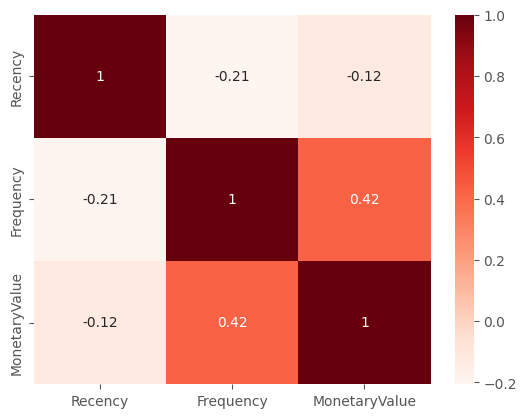

In [ ]:
# Plot the heatmap of the feature correlations in the dataframe
sns.heatmap(rfm_data.corr(), annot = True, cmap = 'Reds')

- I selected this chart to illustrate the relationship between various factors.

- The key takeaway is the negative correlation observed between recency and both frequency and monetary values. This suggests that customers who have recently made a purchase are less inclined to make another one soon. Additionally, there is a positive but weak correlation between frequency and monetary values.

- These insights offer valuable information for businesses to comprehend customer behavior effectively. By understanding these patterns, businesses can customize their sales strategies and promotions to better meet customer needs, potentially leading to increased sales and improved customer satisfaction.








## **Plot the distribution of Recency, Frequency, and MonetaryValue**

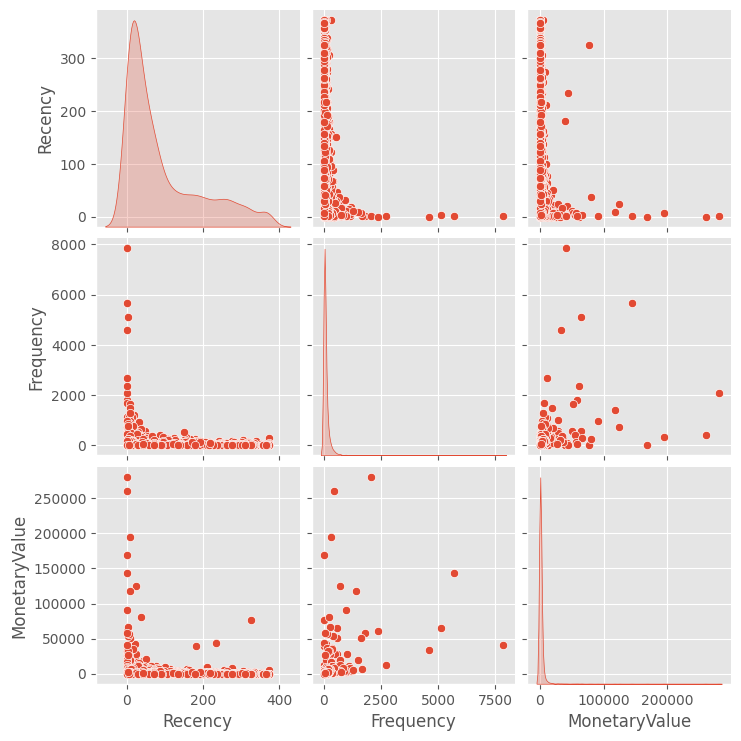

In [ ]:
#Visualize the distribution of features in the dataset
sns.pairplot(rfm_data, diag_kind = 'kde');


- A scatter matrix provides a visual depiction of how different variables or features in a dataset relate to each other. By plotting each variable against the others, it helps uncover patterns, trends, and correlations within the data. This tool is particularly handy for exploratory data analysis, offering valuable insights into the underlying relationships among the variables.

- The pairplot with kernel density estimation (KDE) diagonal plots was selected because it offers a clear visualization of the distribution and pairwise connections among multiple features within a dataset. By presenting these relationships graphically, it enables rapid identification of any correlations or patterns between variables. This makes it a valuable tool for gaining insights into the distribution of features across the dataset.

- We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.

In [ ]:
#The skew() method is used to measure the asymmetry of the data around the mean.
rfm_data.skew()

Recency           1.246137
Frequency        18.106243
MonetaryValue    19.326985
dtype: float64

We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

## **Data Normalization**


To normalize the data, we applied logarithmic transformations to the Recency and Monetary features, and a natural logarithmic transformation to the Frequency feature. This adjustment was made to mitigate the influence of outliers and standardize the data. Additionally, we added a small constant value (0.1) to the original values before applying the logarithm to prevent taking the logarithm of zero or negative values.

In [ ]:
# Calculate the logarithmic values of the Recency and Monetary features

# logarithmic value of the Recency feature
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)

# logarithmic value of the Monetary feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)


# calculate the natural log of the 'Frequency' column
rfm_f_log = np.log(rfm_data['Frequency'])

In [ ]:
# Create a DataFrame containing logarithmic values of the Recency, Monetary and Frequency columns

log_data = pd.DataFrame({'Monetary' : rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


**Ploting the distribution of Recency, Frequency, and MonetaryValue after Data Normalization**

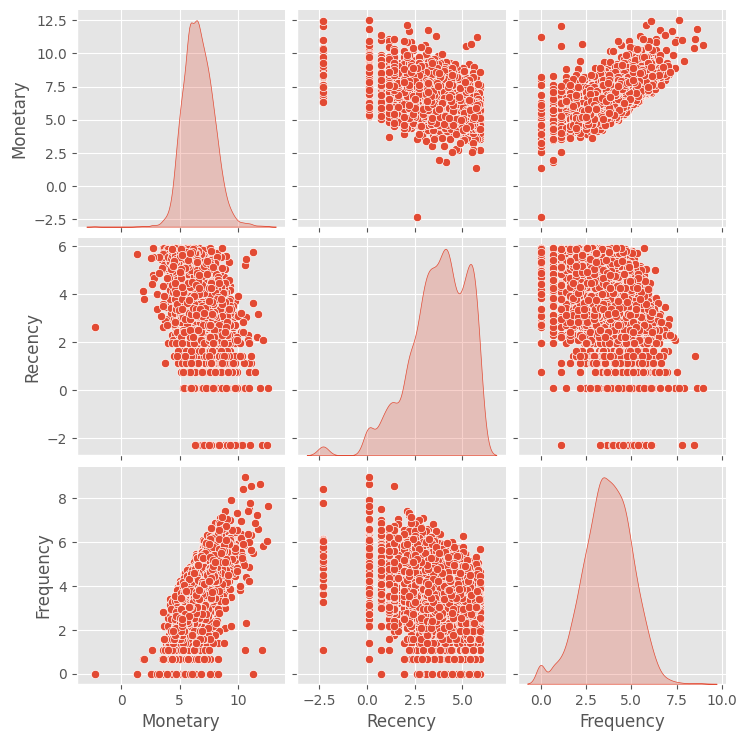

In [ ]:
# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data

sns.pairplot(data = log_data, diag_kind = 'kde');


The Frequency and Monetary features show noticeable improvement in their distributions, appearing more normal after the transformation. However, the Recency feature exhibits some enhancement in its distribution, although it remains less normalized compared to the other two features.

In [ ]:
# Calculate the skewness of each feature in the data
log_data.skew()

Monetary     0.301026
Recency     -0.869174
Frequency   -0.220155
dtype: float64

## **Correlation Heatmap**

<Axes: >

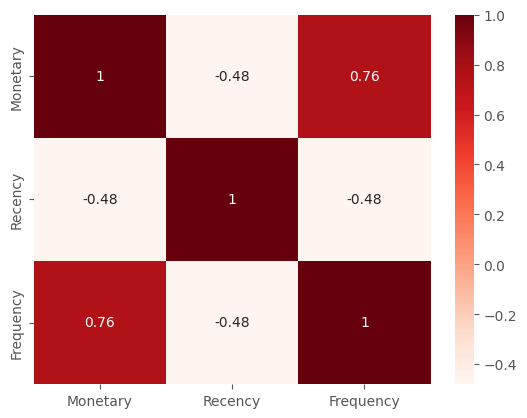

In [ ]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(), annot = True, cmap = 'Reds')

The correlation between Monetary and Frequency is now stronger.

In [ ]:
# use the corr method of the data frame to calculate the correlation matrix
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.480603,0.756373
Recency,-0.480603,1.000000,-0.477778
Frequency,0.756373,-0.477778,1.000000


In [ ]:
# Assign the normalized data to a variable "X"
X = log_data

## **Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

I employed Standardization to transform the features, aiming to achieve uniformity in scale and distribution. This step was crucial as certain machine learning algorithms are sensitive to variations in feature scale and distribution, and Standardization helps to mitigate this issue, ensuring fair and unbiased results.

## ***7. ML Model Implementation***

## **7.1. K-means Implementation**

- When working with k-means clustering, one common hurdle is determining the optimal number of clusters beforehand. This task isn't always straightforward and can pose a challenge, as the ideal number of clusters isn't always evident from the data alone. To address this issue, a widely adopted approach involves experimenting with various cluster counts and evaluating their corresponding silhouette coefficients.

- The Silhouette Coefficient serves as a measure of how closely a data point aligns with its assigned cluster, ranging from -1 (indicating significant dissimilarity) to 1 (indicating strong similarity). By computing the silhouette coefficient for each data point, we gain insights into how well it fits within its cluster. A higher silhouette coefficient implies a closer alignment with the cluster, signifying better clustering performance.

- Another technique utilized to determine the optimal number of clusters is the Elbow method. This method entails plotting the number of clusters against the corresponding distortion or inertia, which represents the sum of squared distances between each point and its centroid. The resulting plot often exhibits an "elbow" shape, and the cluster count at the "elbow" point is typically considered a suitable choice for the optimal number of clusters.

- It's important to acknowledge that the performance of k-means is heavily influenced by its initializations, as they significantly impact the quality of the resulting solutions. To mitigate this concern, a sophisticated initialization approach known as k-means++ is frequently employed. K-means++ intelligently selects the initial cluster centroids, thereby enhancing the algorithm's ability to converge to high-quality solutions. Leveraging k-means++ initialization improves the algorithm's efficacy in finding optimal cluster arrangements.

### **7.1.1 K-Means with silhouette_score**

In [ ]:
silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)

  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the Silhouette score
  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')

Silhouette score for 2 clusters: 0.395
Silhouette score for 3 clusters: 0.307
Silhouette score for 4 clusters: 0.296
Silhouette score for 5 clusters: 0.276
Silhouette score for 6 clusters: 0.277
Silhouette score for 7 clusters: 0.267
Silhouette score for 8 clusters: 0.264
Silhouette score for 9 clusters: 0.249
Silhouette score for 10 clusters: 0.255
Silhouette score for 11 clusters: 0.257
Silhouette score for 12 clusters: 0.259
Silhouette score for 13 clusters: 0.259
Silhouette score for 14 clusters: 0.261
Silhouette score for 15 clusters: 0.256


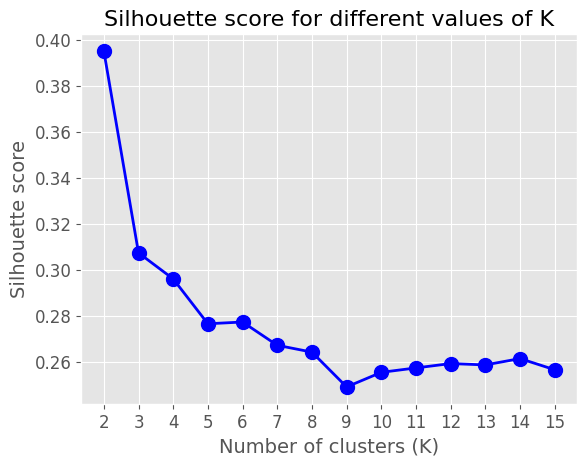

In [ ]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='blue', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**The best silhouette score obtained is when the number of clusters is 2.**

In [ ]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters = 2)


# Fit the input data X to the Mean Model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

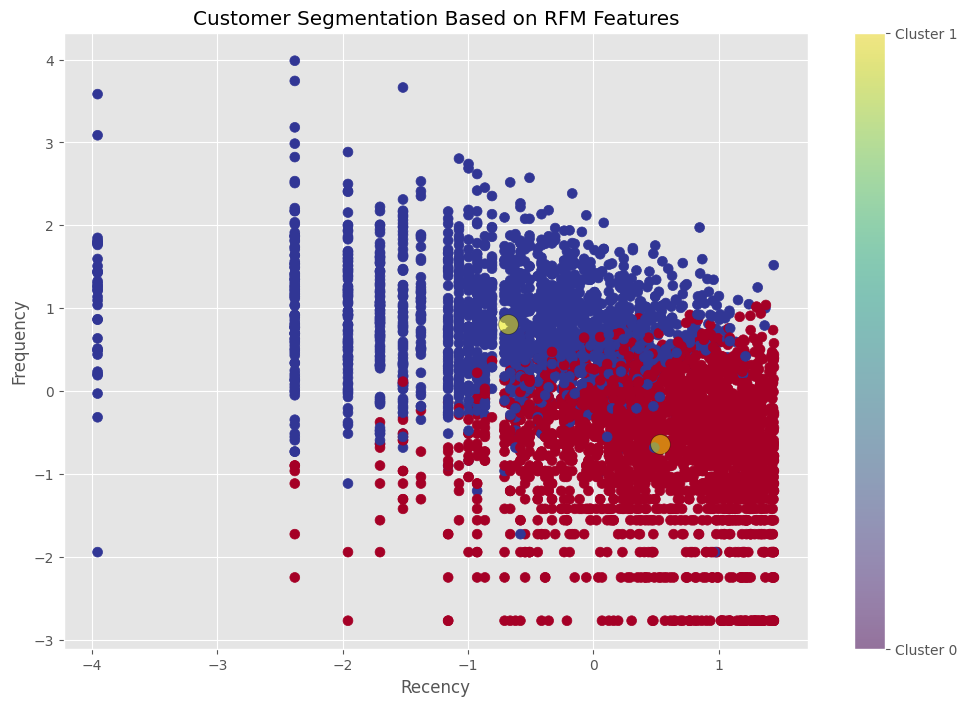

In [ ]:
# Visualization of customer segmentation based On RFM features.
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

### **7.1.2 K-Means with Elbow method**

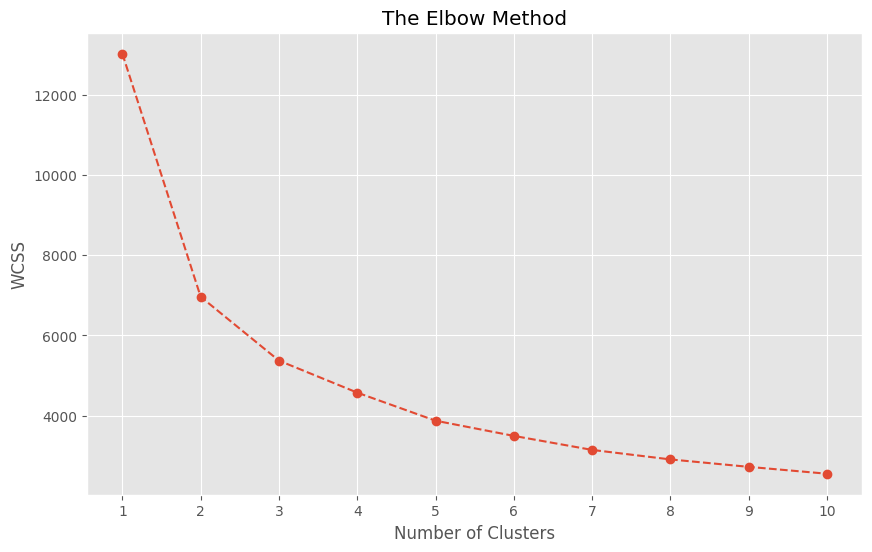

In [ ]:
# Input data X

# Initialize an empty list to store the WCSS values for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


**The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.**

In [ ]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346.0,325,1,77183.60,1,1,4,114,0
1,12347.0,2,182,4310.00,4,4,4,444,1
2,12348.0,75,31,1797.24,2,2,4,224,0
3,12349.0,18,73,1757.55,3,3,4,334,1
4,12350.0,310,17,334.40,1,1,2,112,0
5,12352.0,36,85,2506.04,3,3,4,334,1
6,12353.0,204,4,89.00,1,1,1,111,0
7,12354.0,232,58,1079.40,1,3,3,133,0
8,12355.0,214,13,459.40,1,1,2,112,0
9,12356.0,22,59,2811.43,3,3,4,334,1


### ML Model - 2
# **Agglomerative Hierarchial Clustering**


Agglomerative Hierarchical Clustering operates in a bottom-up fashion, gradually merging clusters that share similarities until the desired number of clusters is attained. This method relies on a distance or similarity metric between data points to determine which clusters to merge at each step. Additionally, it can generate a dendrogram, offering a visual representation of the merging process and showcasing the hierarchical relationships within the data.

While Agglomerative Hierarchical Clustering effectively captures hierarchical structures in the data, it comes with certain limitations. For instance, it can be computationally intensive, particularly for larger datasets, due to its iterative nature. Moreover, this approach may not be well-suited for high-dimensional data, as it can struggle to handle the increased complexity associated with such datasets. Therefore, while Agglomerative Hierarchical Clustering offers valuable insights into the data's hierarchical organization, it may not always be the optimal choice, especially for large or high-dimensional datasets.

In [ ]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)

AgglomerativeClustering(affinity='euclidean')

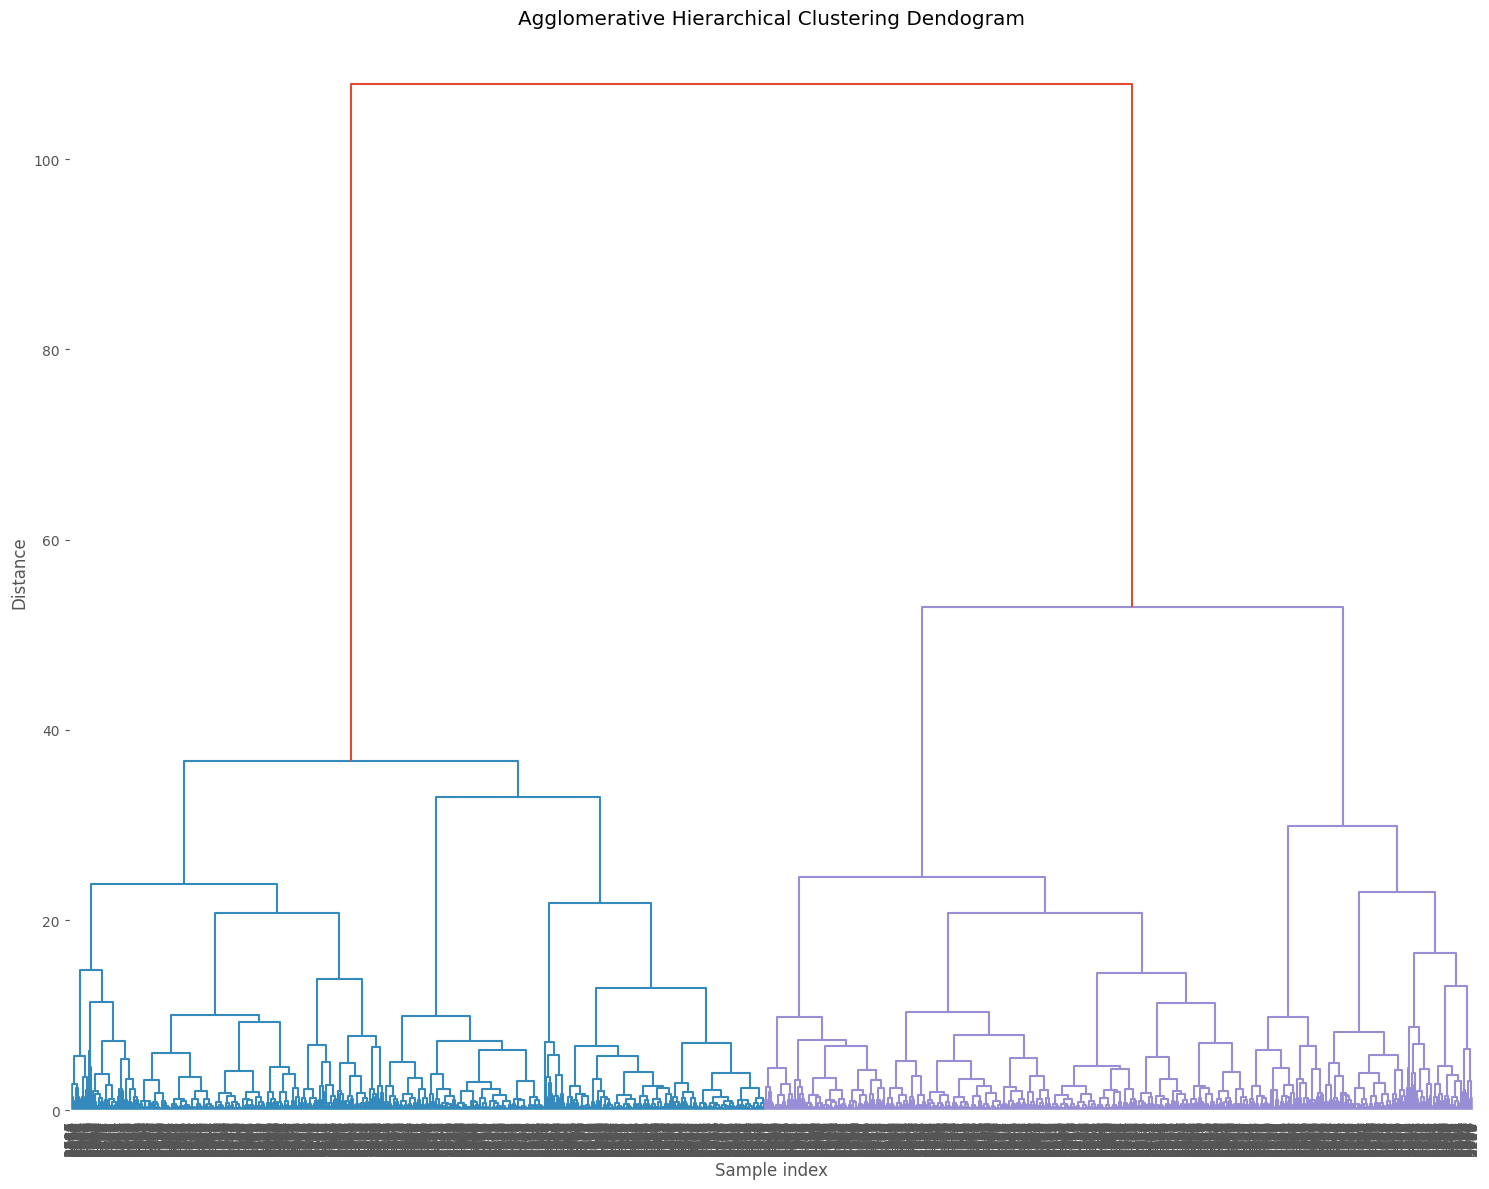

In [ ]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

### ML Model - 3
# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**


DBSCAN, or Density-Based Spatial Clustering of Applications with Noise, is an algorithm designed to cluster data points based on their density distribution within the feature space. Unlike other clustering algorithms, DBSCAN does not require prior knowledge of the number of clusters to be specified. Instead, it identifies clusters as dense regions separated by areas of lower density.

One of the key advantages of DBSCAN is its robustness to noise and outliers. By focusing on regions of high density, DBSCAN can effectively ignore outliers and noise points that fall in sparsely populated areas of the feature space. This makes it particularly useful for datasets with irregular shapes and varying densities.

The algorithm's performance is governed by two main parameters: the radius (Eps) and the minimum number of points (MinPts) required to form a core point. These parameters determine the density threshold for identifying clusters and play a crucial role in the clustering process. Adjusting these parameters can impact the resulting cluster structure, allowing users to tailor the algorithm to their specific dataset and clustering requirements.

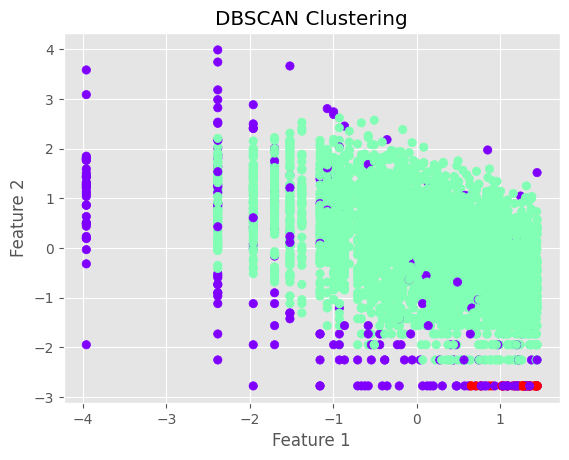

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- The scatter plot chosen for visualization effectively displays the clustering results obtained from the DBSCAN algorithm. Each point on the plot represents a data point from the dataset, with its position determined by the values of two selected features. The color of each point indicates its assigned cluster label.

- By analyzing the scatter plot, we can discern the clusters formed by DBSCAN and their respective densities. Points that are closely located to each other belong to the same cluster, while outliers or noise points are marked with the label -1. This visualization allows us to grasp the overall structure of the data and identify any discernible patterns or anomalies.

- These insights are valuable for businesses as they enable targeted strategies based on customer segments or operational processes. By recognizing groups of similar data points, companies can tailor their marketing efforts or operational procedures to better meet the needs of specific customer segments, ultimately leading to improved efficiency and customer satisfaction.

# **Summary Table**

In [ ]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
|   4    |            DBSCAN             | RFM  |             3             |
+--------+-------------------------------+------+---------------------------+


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


**Exploratory Data Analysis (EDA).**

- Data preprocessing steps involved the removal of null values and duplicates from the dataset to ensure data quality before applying clustering algorithms.

- The top customer IDs were identified as 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0, indicating the most active customers.

- Analysis of orders by country revealed that the United Kingdom accounted for the majority of orders (88.95%), followed by Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).

- Stock codes with the highest count values included 85123A, 22423, 85099B, 47566, and 84879, indicating popular items among customers.

- Total order amounts were calculated by multiplying unit price and quantity, enabling analysis of revenue generated by each order.

- Business activity was observed to be highest in the months of November, October, December, September, and May.

- Thursday, Wednesday, Tuesday, Monday, Saturday, and Friday emerged as the most popular purchasing days among customers.

- Analysis of purchasing times revealed that most transactions occurred between 10:00 A.M. and 2:00 P.M., with afternoon being the peak period followed by morning and evening.

**Algorithm**
- RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems in a particular order, making it easy to recommend and display new products to selected customers.

- Different clustering algorithms were applied to the dataset, including: Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.

1. K-Means with Silhouette_score
2. K-Means with Elbow Method
3. Hierarchical Clustering
4. DBSCAN

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***